In [72]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#데이터 불러오기
df = pd.read_csv('./data/df_final.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimate_delivery_time_diff,delivery_time,...,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7 days 02:34:47,8 days 10:17:58,...,maua,SP,-23.583452,-46.586284,-23.675542,-46.442547,3,"credit_card, voucher",1,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,9 days 09:15:17,2 days 18:39:27,...,maua,SP,-23.564977,-46.536043,-23.675542,-46.442547,1,credit_card,3,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,7 days 05:29:59,4 days 23:46:46,...,maua,SP,-23.532175,-46.626106,-23.675542,-46.442547,1,credit_card,1,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,5 days 05:55:01,13 days 15:50:48,...,maua,SP,-27.553442,-48.500027,-23.675542,-46.442547,1,boleto,1,44.09
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23,6 days 04:56:24,6 days 05:13:27,...,maua,SP,-23.494316,-46.364539,-23.675542,-46.442547,1,credit_card,1,83.69


In [73]:
df.order_purchase_timestamp = df.order_purchase_timestamp.apply(pd.to_datetime)

df = df[df['order_purchase_timestamp'].dt.year!=2016]
df.reset_index(inplace=True, drop=True)

In [74]:
df = df[['order_id', 'customer_unique_id', 'order_purchase_timestamp', 'payment_value']]
df['date'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
df.head()

,order_id,customer_unique_id,order_purchase_timestamp,payment_value,date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,38.71,2017-10-02
1,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:31,37.77,2017-08-15
2,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,2017-08-02 18:24:47,37.77,2017-08-02
3,bfc39df4f36c3693ff3b63fcbea9e90a,e781fdcc107d13d865fc7698711cc572,2017-10-23 23:26:46,44.09,2017-10-23
4,8736140c61ea584cb4250074756d8f3b,02c9e0c05a817d4562ec0e8c90f29dba,2017-08-10 13:35:55,83.69,2017-08-10


In [77]:
#컬럼명 변경
df.rename(columns={'customer_unique_id':'UserId', 'order_purchase_timestamp':'OrderDate', 'payment_value':'TotalCharges'}, inplace=True)

#기준이 되는 변수(Order date)를 YYYY-MM 형태로 (년월 형식)
df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))

In [78]:
#첫 구매기간 추출
df.set_index('UserId', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

,UserId,order_id,OrderDate,payment_value,date,OrderPeriod,CohortGroup
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,38.71,2017-10-02,2017-10,2017-09
1,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:31,37.77,2017-08-15,2017-08,2017-08
2,ef0996a1a279c26e7ecbd737be23d235,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:47,37.77,2017-08-02,2017-08,2017-08
3,e781fdcc107d13d865fc7698711cc572,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:46,44.09,2017-10-23,2017-10,2017-10
4,02c9e0c05a817d4562ec0e8c90f29dba,8736140c61ea584cb4250074756d8f3b,2017-08-10 13:35:55,83.69,2017-08-10,2017-08,2017-08


In [91]:
#첫 구매일과 구매일을 기준으로 하여 고객수, 주문수 계산
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'UserId':pd.Series.nunique, # DISTINCT COUNT
                       'order_id':pd.Series.nunique,
                       'TotalCharges':np.sum})

cohorts.rename(columns={'UserId':'TotalUsers',
                        'order_id':'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders  TotalCharges
CohortGroup OrderPeriod                                       
2017-01     2017-01             697          728     130088.78
            2017-02               2            2        111.07
            2017-03               2            2        114.70
            2017-04               1            1         89.70
            2017-05               3            3        246.25

In [92]:
# Label the CohortPeriod for each CohortGroup
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0, group_keys=False).apply(cohort_period)
cohorts.head()

TotalUsers  TotalOrders  TotalCharges  CohortPeriod
CohortGroup OrderPeriod                                                     
2017-01     2017-01             697          728     130088.78             1
            2017-02               2            2        111.07             2
            2017-03               2            2        114.70             3
            2017-04               1            1         89.70             4
            2017-05               3            3        246.25             5

In [96]:
#retention 결과(%)를 위한 계산
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()

user_retention = cohorts['TotalUsers'].unstack(0).div(cohort_group_size, axis=1)
user_retention

CohortGroup,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
CohortPeriod,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.002869,0.001923,0.004530,0.005994,0.004803,0.005097,0.005190,0.006834,0.006927,0.006869,0.005520,0.001751,0.003181,0.003273,0.003799,0.005897,0.005141,0.004133,0.004961,NaN
3,0.002869,0.003205,0.003707,0.002305,0.004503,0.003738,0.003278,0.003543,0.005131,0.002369,0.003777,0.002918,0.003787,0.004092,0.003039,0.002793,0.002648,0.002755,NaN,NaN
4,0.001435,0.000641,0.003707,0.001844,0.003002,0.003738,0.002458,0.002784,0.002822,0.000711,0.001453,0.003307,0.003030,0.003110,0.003039,0.002483,0.001869,NaN,NaN,NaN
5,0.004304,0.004487,0.003707,0.002766,0.002702,0.003058,0.002731,0.003290,0.004618,0.002132,0.001598,0.002334,0.003030,0.002619,0.001216,0.001086,NaN,NaN,NaN,NaN
6,0.001435,0.001282,0.001647,0.002766,0.003302,0.003738,0.002185,0.005315,0.002052,0.001895,0.001743,0.002140,0.001666,0.002128,0.001216,NaN,NaN,NaN,NaN,NaN
7,0.004304,0.002564,0.001647,0.003227,0.004203,0.003398,0.003005,0.002784,0.002309,0.002132,0.001307,0.001556,0.001818,0.001637,NaN,NaN,NaN,NaN,NaN,NaN
8,0.001435,0.001923,0.003295,0.003227,0.001501,0.002039,0.001093,0.002531,0.002565,0.003316,0.002034,0.000195,0.002272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.004304,0.000641,0.002883,0.003227,0.002101,0.001359,0.001912,0.001519,0.002822,0.002605,0.001162,0.001945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


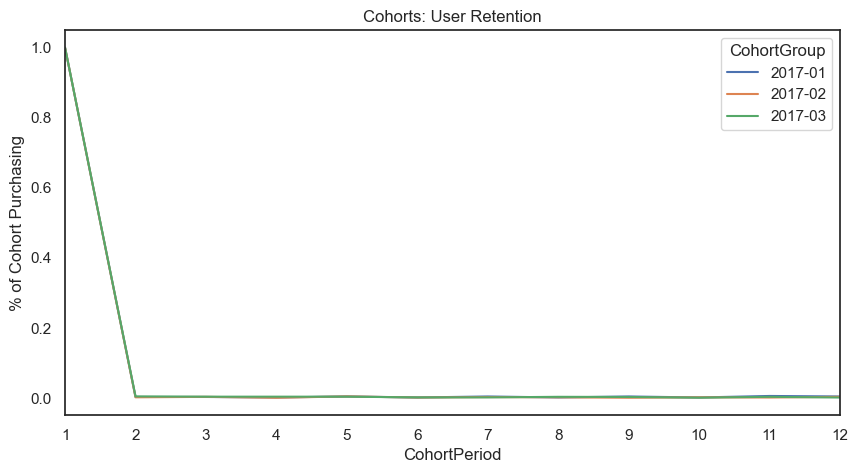

In [103]:
#그래프 표현
user_retention[['2017-01','2017-02', '2017-03']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1,12)
plt.ylabel('% of Cohort Purchasing')
plt.show()

<AxesSubplot: title={'center': 'Cohort: User Retention'}, xlabel='CohortPeriod', ylabel='CohortGroup'>

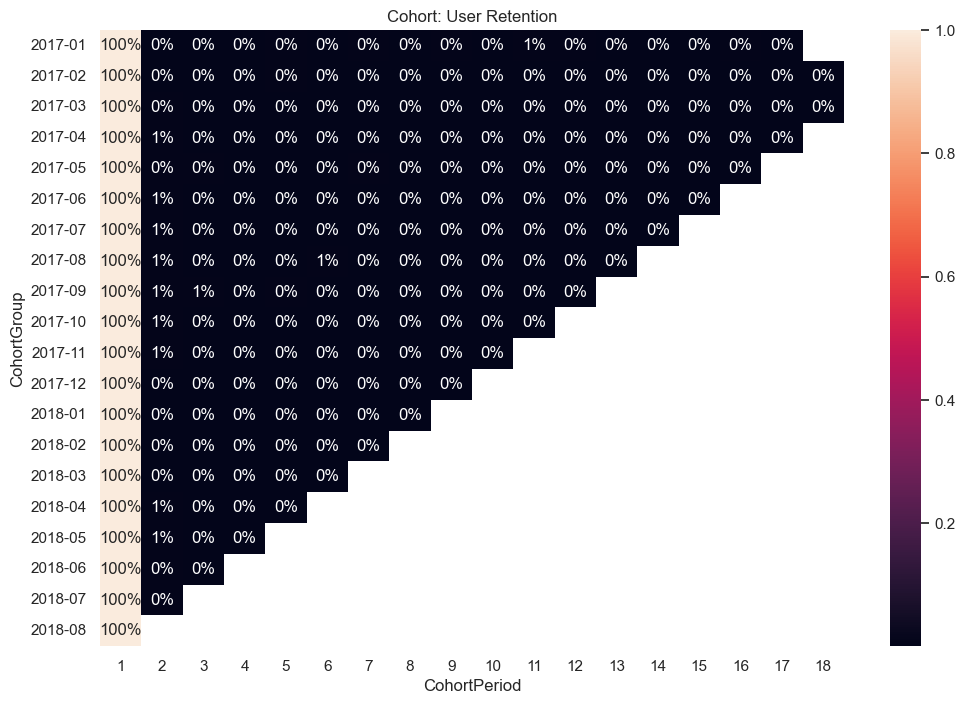

In [104]:
#heatmap 형태 그래프
sns.set(style='white')

plt.figure(figsize=(12,8))
plt.title('Cohort: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')

```
olist 데이터로 프로젝트를 진행하면서 데이터를 탐색해봤을 때,
기존 고객의 재방문율 retention이 높지 않을 것이라고 예상했었는데
역시 1% 이하인 경우가 대부분이었다.

cohort 분석을 통해서 블랙프라이데이에 유입된 고객들이 얼마나 유지될지 알아보고자 했었지만,
retention이 1% 이하이기 때문에 분석이 어려울 것 같다.
```